# Задание к лабораторной работе №8 по машинному обучению

линейная регрессия, полиномиаьная регрессия, регуляризация, логистическая регрессия 

Датасет для задачи регрессии - load_diabetes

Датасет для задачи классификации - load_breast_cancer

1. Регрессия. Применить линейную (и модели с регуляризацией) и полиномиальную регрессию к датасету load_diabetes. Вывести метрики R2, MSE, MAE для двух моделей. Построить scatterplot predicted vs. true.
2. Классификация. Найти оптимальное значение параметра регуляризации $C$ с помощью LogisticRegressionCV – перебора параметров по сетке с последующей кросс-валидацией. Этот класс создан специально для логистической регрессии (для нее известны эффективные алгоритмы перебора параметров), для произвольной модели мы бы использовали GridSearchCV, RandomizedSearchCV. Построить график зависимости метрики ROC-AUC от параметра С.
3. Выбрать порог классификации для LogisticRegression на основе метрики  

In [1]:
# импорт библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_auc_score, roc_curve, f1_score

## Задание 1 Регрессия

In [2]:
# Загрузка датасета
data = load_diabetes()
X, y = data.data, data.target

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Линейная регрессия
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
lr_pred_res = linear_regression.predict(X_test)

In [4]:
# Гребневая регрессия
ridge_regression = Ridge(alpha=0.09) # значение от 0 до бесконечности, при увеличении все метрики ухудшаются, 0 - линейная регрессия
ridge_regression.fit(X_train, y_train)
ridge_pred_res = ridge_regression.predict(X_test)

In [5]:
# Лассо регрессия
lasso_regression = Lasso(alpha=0.09) # значение от 0 до бесконечности
lasso_regression.fit(X_train, y_train)
lasso_pred_res = lasso_regression.predict(X_test)

In [6]:
# Эластичная сеть
elastic_net_regression = ElasticNet(alpha=0.01)
elastic_net_regression.fit(X_train, y_train)
elastic_net_pred_res = elastic_net_regression.predict(X_test)

In [7]:
# Полиномиальная регрессия
poly_features = PolynomialFeatures(degree=2)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

polynomial_regression = LinearRegression()
polynomial_regression.fit(X_poly_train, y_train)
poly_lr_pred_res = polynomial_regression.predict(X_poly_test)

In [8]:
# Функция расчета параметров
def parametrs(y, y_pred,regression):
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    mape = mean_absolute_percentage_error(y, y_pred) # в семинаре использовался этот параметр, но по заданию MAE, етоже посчитан
    print(f"{regression}: R2 = {r2:.5f}, MSE = {mse:.5f}, MAE = {mae:.5f}, MAPE = {mape:.5f}")

In [9]:
# Вывод метрик
parametrs(y_test, lr_pred_res, "Линейная регрессия")
parametrs(y_test, ridge_pred_res, "Гребневая регрессия")
parametrs(y_test, lasso_pred_res, "Лассо регрессия")
parametrs(y_test, elastic_net_pred_res, "Эластичная сеть")
parametrs(y_test, poly_lr_pred_res, "Полиномиальная регрессия")

Линейная регрессия: R2 = 0.45260, MSE = 2900.19363, MAE = 42.79409, MAPE = 0.37500
Гребневая регрессия: R2 = 0.46060, MSE = 2857.84918, MAE = 42.97822, MAPE = 0.37647
Лассо регрессия: R2 = 0.47174, MSE = 2798.81571, MAE = 42.82576, MAPE = 0.37582
Эластичная сеть: R2 = 0.37365, MSE = 3318.50574, MAE = 48.39612, MAPE = 0.45574
Полиномиальная регрессия: R2 = 0.41564, MSE = 3096.02831, MAE = 43.58169, MAPE = 0.38286


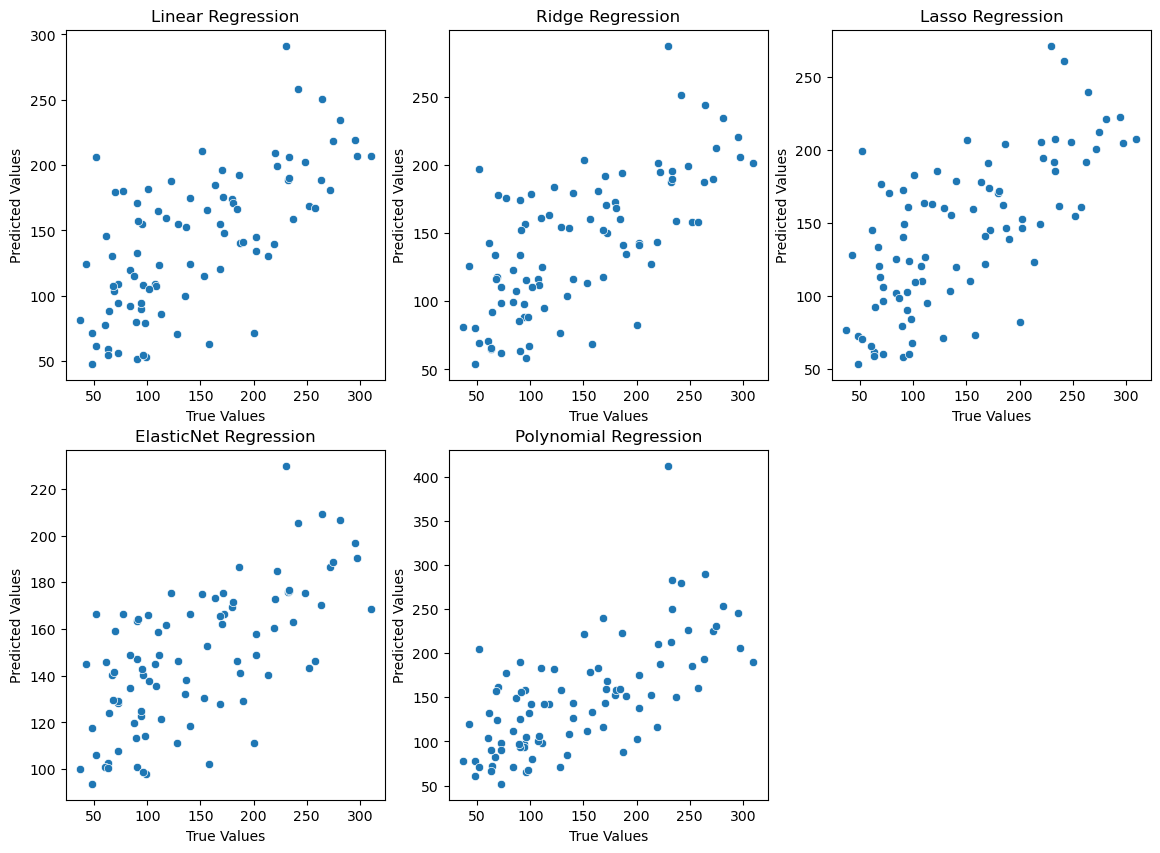

In [10]:
# Построение scatterplot
plt.figure(figsize=(14, 10))

plt.subplot(2, 3, 1)
sns.scatterplot(x=y_test, y=lr_pred_res)
plt.title("Linear Regression")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

plt.subplot(2, 3, 2)
sns.scatterplot(x=y_test, y=ridge_pred_res)
plt.title("Ridge Regression")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

plt.subplot(2, 3, 3)
sns.scatterplot(x=y_test, y=lasso_pred_res)
plt.title("Lasso Regression")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

plt.subplot(2, 3, 4)
sns.scatterplot(x=y_test, y=elastic_net_pred_res)
plt.title("ElasticNet Regression")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

plt.subplot(2, 3, 5)
sns.scatterplot(x=y_test, y=poly_lr_pred_res)
plt.title("Polynomial Regression")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")


plt.show()

In [11]:
import pandas as pd


# Словарь для хранения метрик
metrics = {
    "Модель": ['Линейная регрессия', 'Гребневая регрессия', 'Лассо', 'Эластичная сеть', 'Полиномиальная регрессия'],
    "R2": [0.45260, 0.46060, 0.47174, 0.37365, 0.41564],
    "MSE": [2900.19, 2857.85, 2798.82, 3318.51, 3096.03],
    "MAE": [42.79, 42.98, 42.83, 48.39, 43.58],
    "MAPE": [0.375, 0.376, 0.376, 0.456, 0.383]
}



# Создание DataFrame с метриками
metrics_df = pd.DataFrame(metrics)

# Вывод таблицы
print(metrics_df)

                     Модель       R2      MSE    MAE   MAPE
0        Линейная регрессия  0.45260  2900.19  42.79  0.375
1       Гребневая регрессия  0.46060  2857.85  42.98  0.376
2                     Лассо  0.47174  2798.82  42.83  0.376
3           Эластичная сеть  0.37365  3318.51  48.39  0.456
4  Полиномиальная регрессия  0.41564  3096.03  43.58  0.383


### Вывод  
По полученным метрикам, лучшего всего справилась линейная модель, тк у нее меньше ошибки (MSE, MAE, MAPE) и R2 выше. (без подбора параметров для моделей с регуляризацией)  
При подборе параметров метрики R2 и MSE лучшие у Лассо, а MAE и MAPE у линейной регрессии.

## Задание 2 Классификация

In [12]:
data1 = load_breast_cancer()
X, y = data1.data, data1.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Подбор параметра С

C_values = np.logspace(-4, 4, 10)

logistic_cv = LogisticRegressionCV(Cs=C_values, cv=5, scoring='roc_auc', solver='liblinear', max_iter=1000)
logistic_cv.fit(X_train, y_train)
y_pred_proba = logistic_cv.predict_proba(X_test)[:, 1]

optimal_C = logistic_cv.C_[0]
print(f"Оптимальное значение параметра C: {optimal_C:.4f}")

Оптимальное значение параметра C: 2.7826


In [14]:
# Вычисление метрики ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC: {roc_auc:.5f}")

ROC-AUC: 0.99672


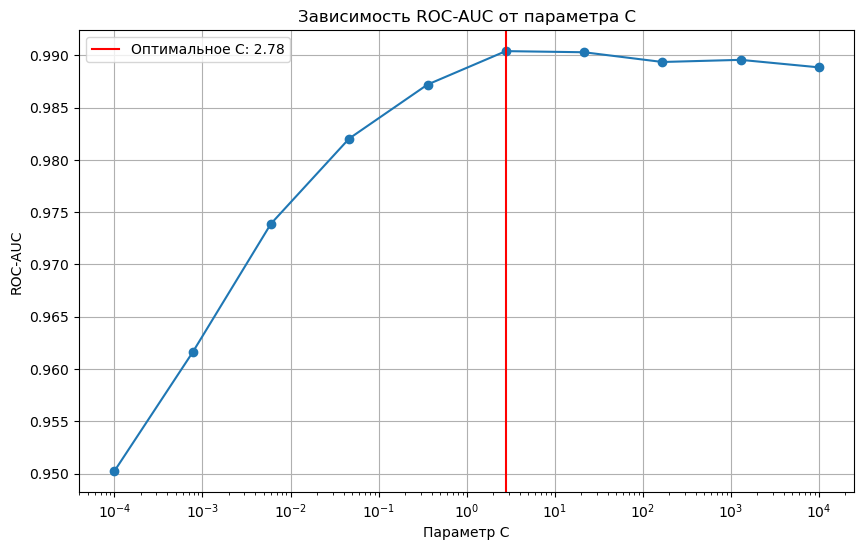

In [15]:
# Построение графика зависимости ROC-AUC от параметра C
mean_scores = logistic_cv.scores_[1].mean(axis=0) # среднее значение параметра ROC_AUC  для С
plt.figure(figsize=(10, 6))
plt.semilogx(C_values, mean_scores, marker='o')
plt.axvline(optimal_C, color='r', label=f'Оптимальное C: {optimal_C:.2f}')
plt.title("Зависимость ROC-AUC от параметра C")
plt.xlabel("Параметр C")
plt.ylabel("ROC-AUC")
plt.legend()
plt.grid()
plt.show()

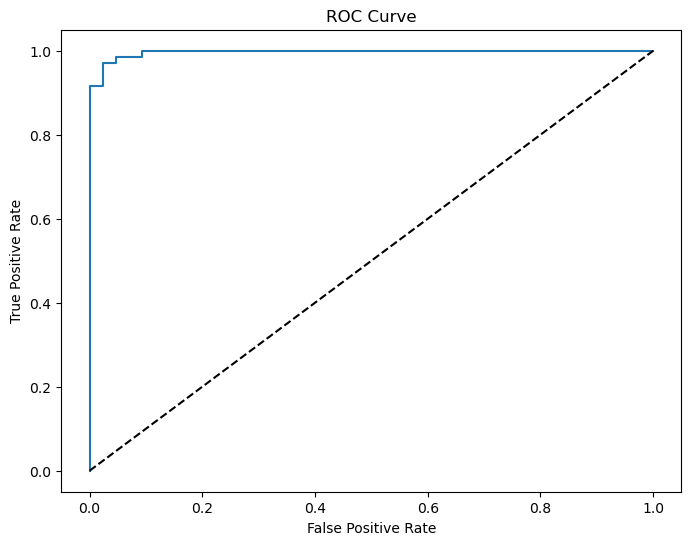

In [16]:
# Построение ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### Вывод  
При выборе диапазона значений С и колчества генерируемых точек, бралось за основу максимальное значение roc_acu.  
Оптимальное С = 2,78  
макс roc_acu = 0,99672

## Задание 3 Поиск порога

In [17]:
thresholds = np.linspace(0, 1, 100)  # проходим 100 порогов от 0 до 1
f1_scores = [f1_score(y_test, y_pred_proba >= t) for t in thresholds] # создает список значений F1-score для каждого порога из thresholds
# Нахождение порога, при котором F1-score - максимальное
optimal_threshold = thresholds[np.argmax(f1_scores)]
f1 = np.max(f1_scores)
print(f"Оптимальный порог классификации: {optimal_threshold:.2f}")
print(f'Максимальный F1-score: {f1:.5f}')

Оптимальный порог классификации: 0.72
Максимальный F1-score: 0.97902


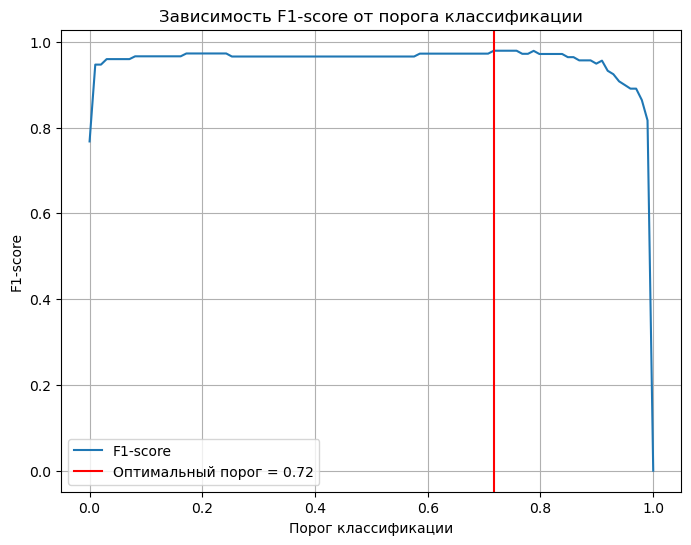

In [18]:
# Построение графика зависимости F1-score от порога
plt.figure(figsize=(8, 6))
plt.plot(thresholds, f1_scores, label="F1-score")
plt.axvline(optimal_threshold, color='r', label=f"Оптимальный порог = {optimal_threshold:.2f}")
plt.xlabel("Порог классификации")
plt.ylabel("F1-score")
plt.title("Зависимость F1-score от порога классификации")
plt.legend()
plt.grid()
plt.show()

### Вывод  
Оптимальный порог классификации равен 0,72 при значении f1 = 0,98